Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex,

In [13]:
import pandas as pd

In [178]:
df=pd.read_csv('dataset.csv')

In [179]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [180]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [181]:
# No null Value

In [182]:
# No categorical Values

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()

In [210]:
#Independent and dependent Variable
from sklearn.model_selection import train_test_split
X=df.drop('target',axis=1)
y=df['target']

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
X_test

array([[ 0.28901314,  0.71713717, -0.9801628 , ..., -0.67796691,
         0.37792709, -2.23530377],
       [ 0.50705864,  0.71713717,  1.91929553, ..., -0.67796691,
        -0.67629057,  1.13753893],
       [ 0.28901314,  0.71713717,  0.95280942, ...,  0.955317  ,
         0.37792709,  1.13753893],
       ...,
       [ 1.37924064, -1.39443338, -0.9801628 , ...,  0.955317  ,
         1.43214475, -0.54888242],
       [ 0.39803589,  0.71713717,  0.95280942, ..., -0.67796691,
        -0.67629057,  1.13753893],
       [ 2.36044538, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242]])

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
classifier=RandomForestClassifier(n_estimators=100, max_depth=10)

In [38]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [39]:
y_pred=classifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score*100)
print(classification_report(y_pred,y_test))

82.41758241758241
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.86      0.83      0.84        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [102]:
importances = classifier.feature_importances_

In [103]:
importances

array([0.08272149, 0.03139797, 0.11881701, 0.06742957, 0.0697593 ,
       0.0082955 , 0.02134232, 0.12497179, 0.07191932, 0.10178252,
       0.0553108 , 0.13862812, 0.10762429])

In [104]:
importances=importances.tolist()

In [116]:
type(importances)

list

In [125]:
dit={}
lst=df.columns.to_list()
for i in range(len(importances)):
    dit[lst[i]]=importances[i]

In [126]:
dit

{'age': 0.08272149298721654,
 'sex': 0.03139797156239239,
 'cp': 0.11881700503510516,
 'trestbps': 0.06742956633414074,
 'chol': 0.06975930090452082,
 'fbs': 0.008295500944170005,
 'restecg': 0.02134232472883502,
 'thalach': 0.1249717894804787,
 'exang': 0.07191931664516236,
 'oldpeak': 0.1017825188068708,
 'slope': 0.05531080226939145,
 'ca': 0.1386281224481288,
 'thal': 0.10762428785358721}

In [127]:
dit=sorted(dit.items(), key=lambda x:x[1],reverse=True)

In [128]:
dit

[('ca', 0.1386281224481288),
 ('thalach', 0.1249717894804787),
 ('cp', 0.11881700503510516),
 ('thal', 0.10762428785358721),
 ('oldpeak', 0.1017825188068708),
 ('age', 0.08272149298721654),
 ('exang', 0.07191931664516236),
 ('chol', 0.06975930090452082),
 ('trestbps', 0.06742956633414074),
 ('slope', 0.05531080226939145),
 ('sex', 0.03139797156239239),
 ('restecg', 0.02134232472883502),
 ('fbs', 0.008295500944170005)]

In [129]:
dit=dit[0:5]

In [130]:
dit

[('ca', 0.1386281224481288),
 ('thalach', 0.1249717894804787),
 ('cp', 0.11881700503510516),
 ('thal', 0.10762428785358721),
 ('oldpeak', 0.1017825188068708)]

In [123]:
import seaborn as sns

In [137]:
lst1=[dit[i][0] for i in range(len(dit))]

In [138]:
lst1

['ca', 'thalach', 'cp', 'thal', 'oldpeak']

In [139]:
lst2=[dit[i][1] for i in range(len(dit))]

In [140]:
lst2

[0.1386281224481288,
 0.1249717894804787,
 0.11881700503510516,
 0.10762428785358721,
 0.1017825188068708]

<AxesSubplot: >

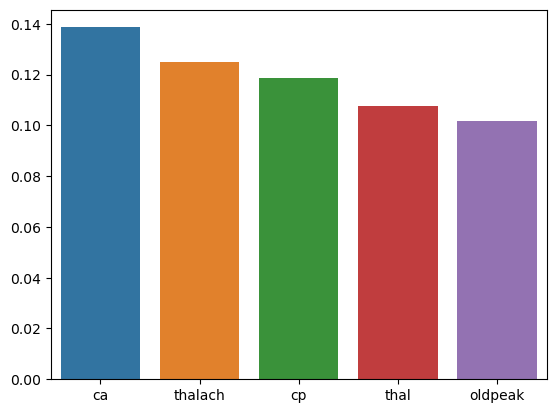

In [142]:
sns.barplot(x=lst1,y=lst2)

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [159]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy'],
                'min_samples_split':[2,3,5,6],
                    'min_samples_leaf':[1,2,4,5]
              }

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
classifier=GridSearchCV(classifier,param_grid=params,scoring='accuracy',cv=5,verbose=3)

In [162]:
classifier.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.3s
[CV 3

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [163]:
y_pred=classifier.predict(X_test)

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [164]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score*100)
print(classification_report(y_pred,y_test))

84.61538461538461
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.88      0.85      0.86        52

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.85      0.85      0.85        91



In [165]:
#Therefore we can see increase in accuracy from 82% to 84% due to hyper parameter tunning using grid search cv

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [201]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [202]:
#[('ca', 0.1386281224481288),
# ('thalach', 0.1249717894804787),

In [203]:
clf=RandomForestClassifier()

In [207]:
clf.fit(X,y)

RandomForestClassifier()

In [211]:
X=df[['ca','thalach']]

In [212]:
X= X.to_numpy()
y=y.to_numpy()

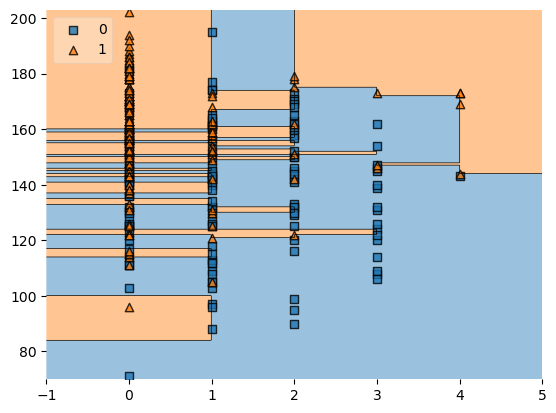

In [213]:
plot_decision_regions(X, y, clf=clf, legend=2)
plt.show()